# Project Ohm

In [61]:
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.stats.sandwich_covariance as sw
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(style="darkgrid")

In [62]:
d = pd.read_csv("../data/meditation.csv")
d.head()

,ID,Group,Name,Recruited_By,Location,Age_Group,Gender,Religion,Pre_existing_blood_pressure,Years_practice,...,After_Med_BP_DIA,After_Med_BP_PUL,Post_Med_focus,B4_color_BP_Sys,B4_color_BP_DIA,B4_color_BP_Pul,After_color_BP_Sys,After_color_BP_DIA,After_color_BP_Pul,Enjoy_Coloring
0,1,0,"Sundell, Jenna",Erika,"San Diego, CA",40-49,F,Buddhist,Low,25,...,59.0,59.0,4.0,108.0,64.0,54.0,94.0,64.0,59.0,2.0
1,2,1,"Hanni, Karin",Erika,"Bellingham, WA",40-49,F,Buddhist,Avg,10,...,61.0,75.0,3.0,122.0,64.0,79.0,101.0,57.0,75.0,3.5
2,3,0,"Roe, Brian",Erika,"Lopez Island, WA",50-59,M,Buddhist,Avg,45,...,73.0,85.0,4.0,123.0,64.0,79.0,109.0,69.0,83.0,4.0
3,4,1,"Aboud, Julie",Erika,"San Diego, CA",50-59,F,Spiritual,Low,47,...,71.0,95.0,3.0,121.0,91.0,100.0,113.0,75.0,93.0,5.0
4,5,0,"Harrison, Kelly",Erika,"Redwood City, CA",50-59,F,Buddhist,Avg,24,...,81.0,79.0,4.0,124.0,79.0,77.0,116.0,65.0,82.0,4.0


In [63]:
d.columns

Index(['ID', 'Group', 'Name', 'Recruited_By', 'Location', 'Age_Group',
       'Gender', 'Religion', 'Pre_existing_blood_pressure', 'Years_practice',
       'caffeinated_drinks', 'hours_since_last_caffeinated_drink',
       'Online_in_person', 'Experiment_Date', 'Start_Time',
       'previous_strenuous_activity', 'Before_Meditation_how_relaxed',
       'B4_Med_BP_Sys', 'B4_Med_BP_DIA', 'B4_Med_BP_PUL', 'After_Med_BP_Sys',
       'After_Med_BP_DIA', 'After_Med_BP_PUL', 'Post_Med_focus',
       'B4_color_BP_Sys', 'B4_color_BP_DIA', 'B4_color_BP_Pul',
       'After_color_BP_Sys', 'After_color_BP_DIA', 'After_color_BP_Pul',
       'Enjoy_Coloring'],
      dtype='object')

In [64]:
# Creating Pandas Series for Outcomes of Interest
d['HeartRate_C'] = d['After_color_BP_Pul']-d['B4_color_BP_Pul']
d['HeartRate_M'] = d['After_Med_BP_PUL']-d['B4_Med_BP_PUL']

d['Sys_C'] = d['After_color_BP_Sys']-d['B4_color_BP_Sys']
d['Sys_M'] = d['After_Med_BP_Sys']-d['B4_Med_BP_Sys']

d['DIA_C'] = d['After_color_BP_DIA']-d['B4_color_BP_DIA']
d['DIA_M'] = d['After_Med_BP_DIA']-d['B4_Med_BP_DIA']

In [65]:
d['order_grp'] = d["Group"].astype('category') 
d['recruiter'] = d["Recruited_By"].astype('category')
d['age'] = d['Age_Group'].astype('category')
d['gen'] = d["Gender"].astype('category')
d['rel'] = d["Religion"].astype('category')
d['bp_cat'] = d["Pre_existing_blood_pressure"].astype('category')
d['yrs'] = d["Years_practice"].astype('category')
d['caf'] = d["caffeinated_drinks"].astype('category')
d["hrs_caf"] = d["hours_since_last_caffeinated_drink"].astype('category')
d["in_pers"] = d["Online_in_person"].astype('category')
d['activity'] = d["previous_strenuous_activity"].astype('category')
d['prior_state'] = d["Before_Meditation_how_relaxed"].astype('category')
d["med_foc"] = d['Post_Med_focus'].astype('category')
d['col_enj'] = d["Enjoy_Coloring"].astype('category')

In [75]:
d = d.dropna()
# Need to round the 2.5 number--because it is causing error...
d['med_foc']=d['med_foc'].round()

In [76]:
# Looking at Heart Rate Change after Meditation
# Including caf NOT hrs_caf
Mrob_ols = sm.ols(formula='HeartRate_M ~ order_grp+ recruiter + age + gen + rel + bp_cat + caf + yrs + in_pers + activity + prior_state + med_foc', data=d).fit(cov_type='HC1', use_t=True)
# + med_foc

Mrob_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_M   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                -3.891e+20
Date:                Mon, 07 Aug 2017   Prob (F-statistic):               1.00
Time:                        04:24:36   Log-Likelihood:                 18.847
No. Observations:                  30   AIC:                             20.31
Df Residuals:                       1   BIC:                             60.94
Df Model:                          28                                         
Covariance Type:                  HC1                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                    -6.7615      1.247     -5.423      0.116       -22.603     9.080
order_grp[T.1]                6.5575      0.935      7.010      0.090        -5.328    18.443
recruiter[T.Post]             5.5109      0.799      6.897      0.092        -4.641    15.663
recruiter[T.Thong]           -7.0639      0.007   -969.793      0.001        -7.156    -6.971
age[T.30-39]                 -2.7342      0.568     -4.815      0.130        -9.949     4.481
age[T.30-40]                 -5.3046      0.877     -6.047      0.104       -16.451     5.841
age[T.40-49]                  1.8600      0.677      2.746      0.222        -6.746    10.466
age[T.40-50]                  3.8336      0.034    113.254      0.006         3.404     4.264
age[T.5-9]                    0.7631      0.070     10.853      0.058        -0.130     1.657
age[T.50-59]                 -2.7303      1.895     -1.441      0.386       -26.813    21.353
age[T.50-60]                 -0.9353      0.909     -1.029      0.491       -12.487    10.616
age[T.60-70]                 -3.3121      0.849     -3.903      0.160       -14.094     7.470
age[T.80-90]                 -5.4611      0.829     -6.585      0.096       -15.999     5.077
gen[T.M]                     -4.7631      0.070    -67.739      0.009        -5.657    -3.870
rel[T.Buddhist]               3.8825      0.730      5.319      0.118        -5.392    13.157
rel[T.Catholic]              -6.2797      0.001  -1.11e+04      0.000        -6.287    -6.273
rel[T.Christian]              2.1988      0.050     44.355      0.014         1.569     2.829
rel[T.Christian/Buddhist]    -2.5151      1.900     -1.324      0.412       -26.653    21.623
rel[T.Hindu]                  0.6391      1.653      0.387      0.765       -20.369    21.647
rel[T.None]                   3.4400      1.228      2.801      0.218       -12.166    19.046
rel[T.Spiritual]             -0.1378      0.587     -0.235      0.853        -7.593     7.318
bp_cat[T.High]               -2.7022      0.591     -4.574      0.137       -10.209     4.805
bp_cat[T.Low]                -7.3798      0.929     -7.947      0.080       -19.179     4.419
caf[T.0.5]                   -7.2421      1.515     -4.779      0.131       -26.497    12.012
caf[T.1.0]                    0.5000      1.936      0.258      0.839       -24.105    25.105
caf[T.2.0]                    6.0263      2.077      2.901      0.211       -20.366    32.419
caf[T.3.0]                   -4.3233      1.569     -2.756      0.222       -24.258    15.611
yrs[T.1]                     -5.5273      0.186    -29.742      0.021        -7.889    -3.166
yrs[T.2]                      5.3047      1.034      5.130      0.123        -7.835    18.445
yrs[T.10]                   -11.7636      1.724     -6.822      0.093      

In [77]:
# Looking at Heart Rate Change after Coloring
# Including caf NOT hrs_caf
rob_ols = sm.ols(formula='HeartRate_C ~ order_grp + recruiter + age + gen + rel + bp_cat + caf + yrs + in_pers + activity + prior_state + col_enj', data=d).fit(cov_type='HC1', use_t=True)
rob_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_C   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.431e+18
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           5.09e-10
Time:                        04:24:37   Log-Likelihood:                -1.9474
No. Observations:                  30   AIC:                             61.89
Df Residuals:                       1   BIC:                             102.5
Df Model:                          28                                         
Covariance Type:                  HC1                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     1.5038      2.694      0.558      0.676       -32.728    35.735
order_grp[T.1]               -2.5933      1.907     -1.360      0.404       -26.820    21.633
recruiter[T.Post]             1.0913      0.121      9.054      0.070        -0.440     2.623
recruiter[T.Thong]            4.1902      0.326     12.867      0.049         0.052     8.328
age[T.30-39]                 -0.7608      0.390     -1.952      0.301        -5.713     4.191
age[T.30-40]                 -8.6679      2.484     -3.490      0.178       -40.225    22.889
age[T.40-49]                  3.3380      0.313     10.674      0.059        -0.636     7.312
age[T.40-50]                  8.4460      0.696     12.141      0.052        -0.393    17.286
age[T.5-9]                   -8.6187      0.864     -9.972      0.064       -19.600     2.363
age[T.50-59]                  5.3816      3.315      1.623      0.351       -36.743    47.506
age[T.50-60]                  8.1380      2.999      2.714      0.225       -29.967    46.242
age[T.60-70]                  1.5890      0.186      8.525      0.074        -0.779     3.957
age[T.80-90]                  0.4126      0.246      1.677      0.342        -2.713     3.538
gen[T.M]                      1.1807      0.794      1.487      0.377        -8.909    11.271
rel[T.Buddhist]               1.4013      1.536      0.912      0.529       -18.119    20.922
rel[T.Catholic]               6.7299      0.682      9.863      0.064        -1.940    15.400
rel[T.Christian]              2.6803      0.307      8.733      0.073        -1.220     6.580
rel[T.Christian/Buddhist]    -0.8971      3.225     -0.278      0.827       -41.875    40.081
rel[T.Hindu]                  7.3769      2.091      3.529      0.176       -19.186    33.940
rel[T.None]                  -4.8646      3.279     -1.484      0.378       -46.530    36.800
rel[T.Spiritual]             -3.1843      1.224     -2.602      0.234       -18.733    12.364
bp_cat[T.High]                0.3820      0.181      2.113      0.281        -1.915     2.679
bp_cat[T.Low]                 1.8509      2.196      0.843      0.554       -26.053    29.755
caf[T.0.5]                    5.0352      3.420      1.472      0.380       -38.417    48.488
caf[T.1.0]                   -6.5620      2.215     -2.963      0.207       -34.701    21.577
caf[T.2.0]                   -0.7428      1.421     -0.523      0.693       -18.792    17.306
caf[T.3.0]                    4.9161      3.235      1.520      0.371       -36.188    46.020
yrs[T.1]                     -3.5044      0.863     -4.060      0.154       -14.473     7.464
yrs[T.2]                    -14.7205      0.717    -20.527      0.031       -23.832    -5.609
yrs[T.10]                    -2.2431      0.509     -4.406      0.142      

# Adjusting To "Cleaner" Categories

### First Clean Up Years Practiced

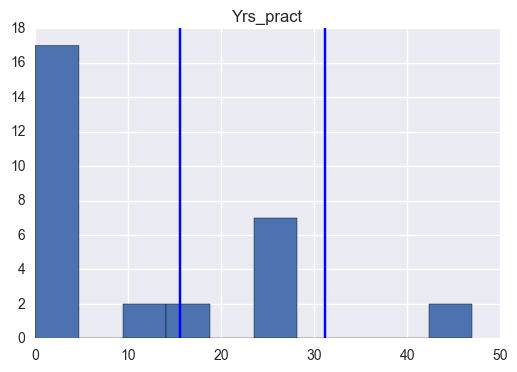

In [108]:
plt.hist(d["Years_practice"], bins=10)
plt.title("Yrs_pract")
plt.axvline(x=15.6)
plt.axvline(x=31.2)
plt.show()

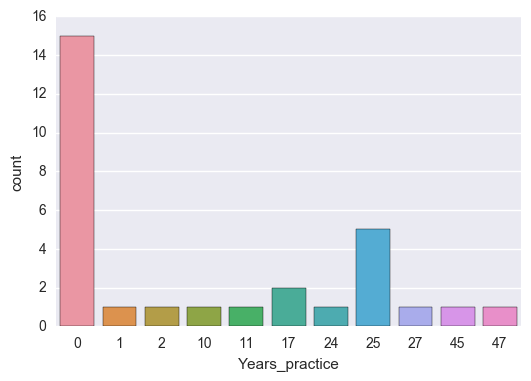

In [109]:
sns.countplot(x="Years_practice", data=d)

In [110]:
# Using function for mapping years
# Played around with different breakdowns, but think this is the most straightforward
# Corresponds to meditation experience or no meditation experience...
def yrMap(x):
    if x<0:
        return "Error"
    if x==0:
        return 0
    else:
        return 1

In [111]:
d['new_yr'] = d["Years_practice"].map(yrMap)

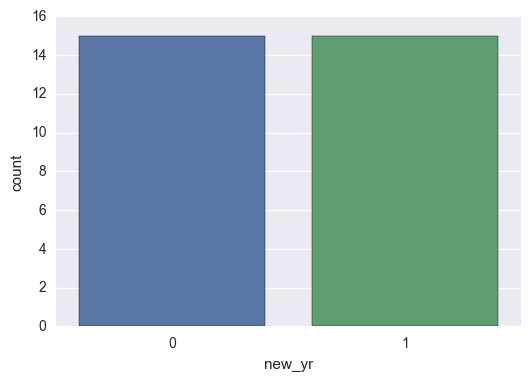

In [112]:
sns.countplot(x="new_yr", data=d)

### Now Clean Up Ages

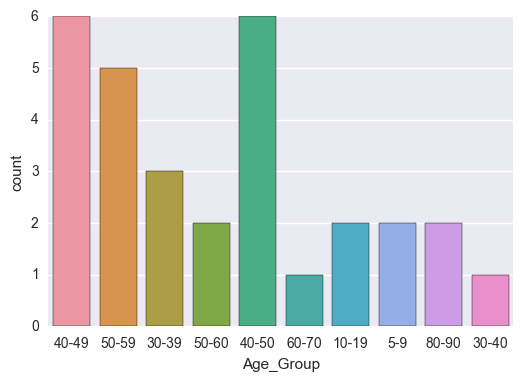

In [92]:
sns.countplot(x="Age_Group", data=d)

In [93]:
# First just clean up what appears to be an error in the data
def ageMap(x):
    if x== '30-40':
        return '30-39'
    if x=='40-50':
        return '40-49'
    if x== '50-60':
        return '50-59'
    else:
        return x

In [94]:
d['new_age'] = d["Age_Group"].map(ageMap)

In [95]:
d['age2'] = d['new_age'].astype('category')

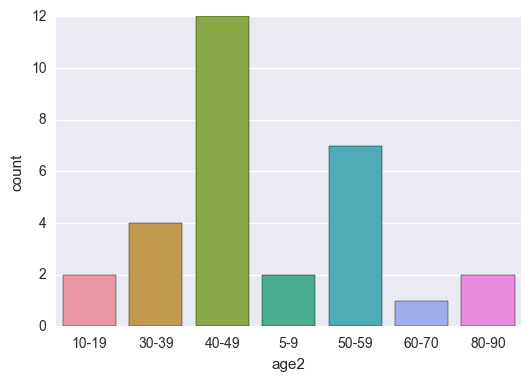

In [96]:
sns.countplot(x="age2", data=d)

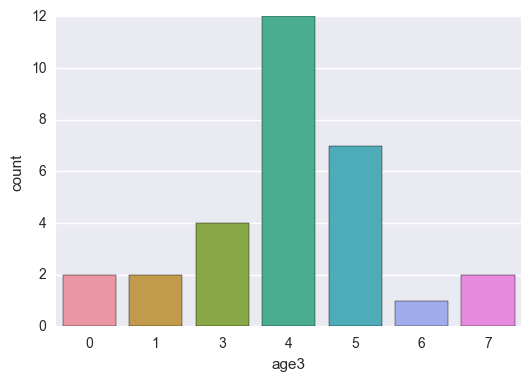

In [97]:
# Mapping years to integers
# Utilize a second map to create a third 'age' series as a set of integers
def ageMap2(x):
    if x=='5-9':
        return 0
    if x=='10-19':
        return 1
    if x=='20-29':
        return 2
    if x=='30-39':
        return 3
    if x=='40-49':
        return 4
    if x=='50-59':
        return 5
    if x=='60-70':
        return 6
    if x=='80-90':
        return 7
d['age3'] = d["age2"].map(ageMap2).astype(int)
sns.countplot(x="age3", data=d)

### Now Clean Up Religion...a monumental effort

In [98]:
# First Catholic to Christian
def relMap(x):
    if x=='Cathollic' or x=='Catholic' or x=='Christian':
        return 'C'
    if x=='Buddhist':
        return 'B'
    if x== 'None':
        return 'None'
    else:
        return 'Other'

In [99]:
d['new_rel'] = d["Religion"].map(relMap)

In [100]:
d['rel2'] = d['new_rel'].astype('category')

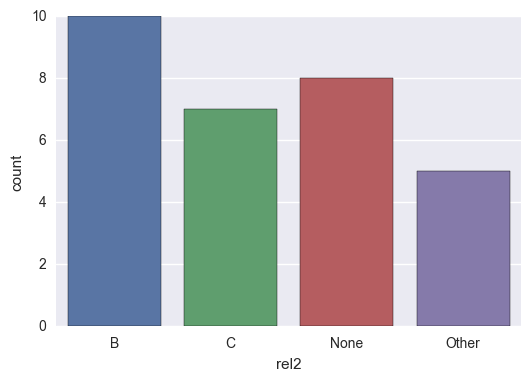

In [101]:
# Plot religious distribution to see break-out:
sns.countplot(x="rel2", data=d)


### Now Clean Up Caffeine

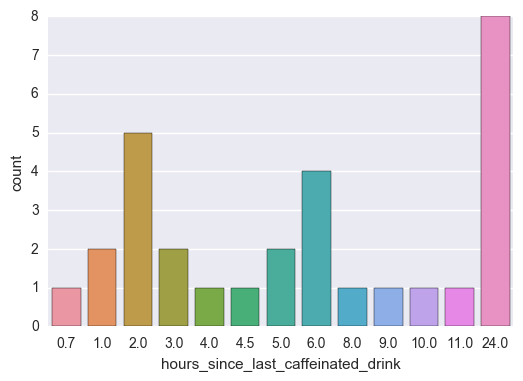

In [102]:
sns.countplot(x='hours_since_last_caffeinated_drink', data=d)

In [103]:
# Ensure higher numbers relate to having caffeine closer to the time of taking the test...
def hcafMap(x):
    if x==24:
        return 0
    else:
        return 11-x

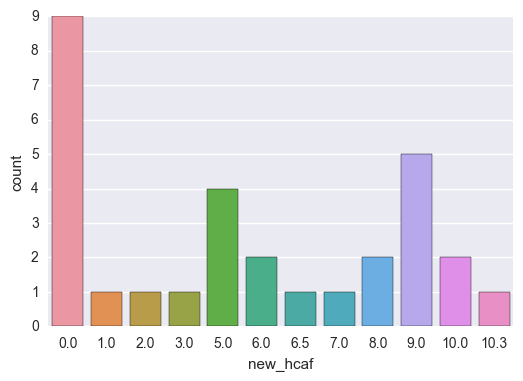

In [104]:
d['new_hcaf'] = d["hours_since_last_caffeinated_drink"].map(hcafMap)
sns.countplot(x='new_hcaf', data=d)

# Clean Up In-Person

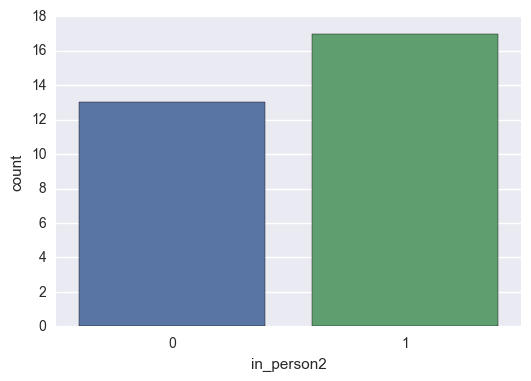

In [151]:
def OImap(x):
    if x=='O':
        return 0
    else:
        return 1

d['in_person2'] = d["Online_in_person"].map(OImap)
sns.countplot(x='in_person2', data=d)

# Clean Up Activity

In [ ]:
def OImap(x):
    if x=='O':
        return 0
    else:
        return 1

d['new_person'] = d["Online_in_person"].map(OImap)
sns.countplot(x='new_person', data=d)

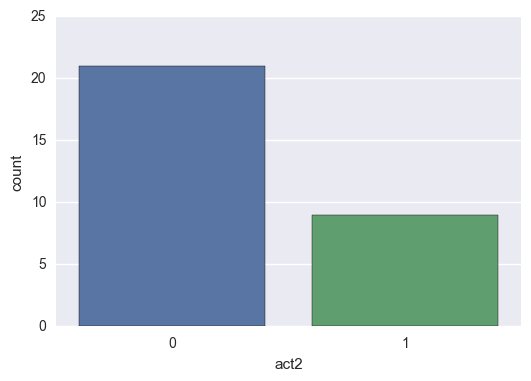

In [134]:
def actMap(x):
    if x == "Yes":
        return 1
    else:
        return 0
    
d['act2'] = d["previous_strenuous_activity"].map(actMap)
sns.countplot(x='act2', data=d)

# Clean Up Previous State:  Relaxed/Tense

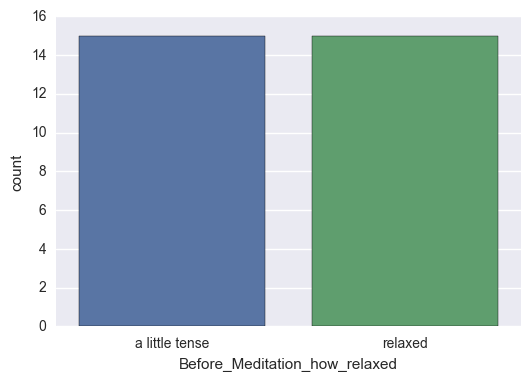

In [137]:
sns.countplot(x='Before_Meditation_how_relaxed', data=d)

In [140]:
# choosing tense as 1 because tension sets up more potential for relaxation...
# challenge: one measurement taken before tests...so the first experiment stage (coloring or meditation)
# may show the most lowering of blood pressure...when coloring comes first, we might expect to see it compete better with meditation
# that is when the subject is tense...then colors...(initial spike already lowered)...then meditation...(less lowering)

def tensorMap(x):
    if x == 'a little tense':
        return 1
    else:
        return 0
    
d['tense2'] = d['Before_Meditation_how_relaxed'].map(tensorMap)

# Running Analysis With Clean(er) Variables

In [142]:
Mrob_ols2 = sm.ols(formula='HeartRate_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc', data=d).fit(cov_type='HC1', use_t=True)

Mrob_ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_M   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     2.919
Date:                Mon, 07 Aug 2017   Prob (F-statistic):             0.0288
Time:                        05:03:57   Log-Likelihood:                -80.804
No. Observations:                  30   AIC:                             195.6
Df Residuals:                      13   BIC:                             219.4
Df Model:                          16                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.2386     10.331      0.023      0.982       -22.081    22.558
order_grp[T.1]         2.0094      2.202      0.913      0.378        -2.747     6.766
recruiter[T.Post]      9.1866      8.470      1.085      0.298        -9.112    27.486
recruiter[T.Thong]    -5.3718      3.967     -1.354      0.199       -13.942     3.199
gen[T.M]               1.7187      3.523      0.488      0.634        -5.891     9.329
rel2[T.C]             -2.1931      6.396     -0.343      0.737       -16.011    11.625
rel2[T.None]           4.3564      6.014      0.724      0.482        -8.636    17.349
rel2[T.Other]         -3.6407      3.802     -0.957      0.356       -11.855     4.574
bp_cat[T.High]         1.6085      6.695      0.240      0.814       -12.854    16.071
bp_cat[T.Low]         -1.7651      4.671     -0.378      0.712       -11.857     8.327
age3                   0.3946      1.385      0.285      0.780        -2.597     3.387
new_hcaf              -0.2180      0.438     -0.497      0.627        -1.165     0.729
new_yr                 4.3225      3.282      1.317      0.211        -2.768    11.413
new_person            -2.6039      4.770     -0.546      0.594       -12.909     7.701
act2                   4.1481      2.739      1.515      0.154        -1.769    10.065
tense2                -3.7823      2.244     -1.685      0.116        -8.631     1.067
med_foc               -0.4347      2.099     -0.207      0.839        -4.969     4.099
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   2.868
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.162
Skew:                           0.180   Prob(JB):                        0.922
Kurtosis:                       2.988   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

d['HeartRate_C'] = d['After_color_BP_Pul']-d['B4_color_BP_Pul']
d['HeartRate_M'] = d['After_Med_BP_PUL']-d['B4_Med_BP_PUL']

d['Sys_C'] = d['After_color_BP_Sys']-d['B4_color_BP_Sys']
d['Sys_M'] = d['After_Med_BP_Sys']-d['B4_Med_BP_Sys']

d['DIA_C'] = d['After_color_BP_DIA']-d['B4_color_BP_DIA']
d['DIA_M'] = d['After_Med_BP_DIA']-d['B4_Med_BP_DIA']

In [143]:
Msys = sm.ols(formula='Sys_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + new_person + act2 + tense2 + med_foc', data=d).fit(cov_type='HC1', use_t=True)

Msys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sys_M   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     7.767
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           0.000299
Time:                        05:08:44   Log-Likelihood:                -108.02
No. Observations:                  30   AIC:                             250.0
Df Residuals:                      13   BIC:                             273.9
Df Model:                          16                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            -13.6317     21.136     -0.645      0.530       -59.294    32.031
order_grp[T.1]         2.3110      5.001      0.462      0.652        -8.493    13.115
recruiter[T.Post]     17.6288     18.972      0.929      0.370       -23.357    58.614
recruiter[T.Thong]     0.4473      7.761      0.058      0.955       -16.319    17.214
gen[T.M]              -4.0039      7.434     -0.539      0.599       -20.064    12.056
rel2[T.C]            -27.3165     13.775     -1.983      0.069       -57.076     2.443
rel2[T.None]           0.2677      9.466      0.028      0.978       -20.182    20.717
rel2[T.Other]          2.1378      8.102      0.264      0.796       -15.366    19.642
bp_cat[T.High]        17.9473     14.607      1.229      0.241       -13.608    49.503
bp_cat[T.Low]        -16.9430      8.513     -1.990      0.068       -35.335     1.449
age3                   3.3833      3.520      0.961      0.354        -4.222    10.988
new_hcaf              -2.5566      1.252     -2.042      0.062        -5.261     0.148
new_yr                 5.9600      9.746      0.612      0.551       -15.095    27.015
new_person            14.8319     11.100      1.336      0.204        -9.148    38.812
act2                  11.8343      6.673      1.773      0.100        -2.583    26.251
tense2                 1.0409      3.945      0.264      0.796        -7.483     9.564
med_foc               -1.0441      4.482     -0.233      0.819       -10.727     8.638
==============================================================================
Omnibus:                        0.020   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.206
Skew:                          -0.030   Prob(JB):                        0.902
Kurtosis:                       2.599   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [144]:
Mdia = sm.ols(formula='DIA_M ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc', data=d).fit(cov_type='HC1', use_t=True)

Mdia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DIA_M   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     15.22
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           6.82e-06
Time:                        05:09:18   Log-Likelihood:                -92.162
No. Observations:                  30   AIC:                             218.3
Df Residuals:                      13   BIC:                             242.1
Df Model:                          16                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -7.7890     11.248     -0.693      0.501       -32.088    16.510
order_grp[T.1]        -1.5920      3.601     -0.442      0.666        -9.372     6.188
recruiter[T.Post]     18.0191      9.466      1.904      0.079        -2.430    38.468
recruiter[T.Thong]     1.1915      4.406      0.270      0.791        -8.328    10.710
gen[T.M]              -4.8901      5.750     -0.850      0.410       -17.312     7.532
rel2[T.C]            -30.6534      7.014     -4.371      0.001       -45.805   -15.502
rel2[T.None]           8.2648      4.360      1.896      0.080        -1.153    17.683
rel2[T.Other]         -2.1124      3.809     -0.555      0.589       -10.342     6.117
bp_cat[T.High]        14.1906      8.460      1.677      0.117        -4.086    32.467
bp_cat[T.Low]        -13.2319      5.586     -2.369      0.034       -25.301    -1.163
age3                   1.9896      2.050      0.971      0.349        -2.439     6.418
new_hcaf              -1.6332      0.818     -1.997      0.067        -3.400     0.133
new_yr                -3.7531      5.441     -0.690      0.502       -15.508     8.002
new_person             5.2718      5.805      0.908      0.380        -7.268    17.812
act2                   3.5632      3.962      0.899      0.385        -4.995    12.122
tense2                 4.1552      3.083      1.348      0.201        -2.505    10.816
med_foc                1.5512      3.324      0.467      0.648        -5.629     8.731
==============================================================================
Omnibus:                        0.101   Durbin-Watson:                   2.393
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.174
Skew:                           0.118   Prob(JB):                        0.917
Kurtosis:                       2.711   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# Color Enjoyment

In [146]:
d.columns

Index(['ID', 'Group', 'Name', 'Recruited_By', 'Location', 'Age_Group',
       'Gender', 'Religion', 'Pre_existing_blood_pressure', 'Years_practice',
       'caffeinated_drinks', 'hours_since_last_caffeinated_drink',
       'Online_in_person', 'Experiment_Date', 'Start_Time',
       'previous_strenuous_activity', 'Before_Meditation_how_relaxed',
       'B4_Med_BP_Sys', 'B4_Med_BP_DIA', 'B4_Med_BP_PUL', 'After_Med_BP_Sys',
       'After_Med_BP_DIA', 'After_Med_BP_PUL', 'Post_Med_focus',
       'B4_color_BP_Sys', 'B4_color_BP_DIA', 'B4_color_BP_Pul',
       'After_color_BP_Sys', 'After_color_BP_DIA', 'After_color_BP_Pul',
       'Enjoy_Coloring', 'HeartRate_C', 'HeartRate_M', 'Sys_C', 'Sys_M',
       'DIA_C', 'DIA_M', 'order_grp', 'recruiter', 'age', 'gen', 'rel',
       'bp_cat', 'yrs', 'caf', 'hrs_caf', 'in_pers', 'activity', 'prior_state',
       'med_foc', 'col_enj', 'new_person', 'new_rel', 'rel2', 'new_hcaf',
       'new_age', 'age2', 'age3', 'new_yr', 'act2', 'tense2', 'HR_diff',
 

In [147]:
d['Enjoy_Coloring']

0     2.0
1     3.5
2     4.0
3     5.0
4     4.0
5     2.0
6     4.0
7     4.0
8     4.0
9     4.0
10    5.0
11    3.0
12    4.0
13    4.0
14    4.0
15    3.5
16    4.0
17    3.0
18    4.0
19    4.0
20    5.0
23    2.0
24    4.0
25    4.0
26    4.0
27    3.0
28    4.0
29    3.0
30    4.0
31    3.0
Name: Enjoy_Coloring, dtype: float64

# Now Do "Difference in Differences"

In [145]:
d['HR_diff'] = d['HeartRate_M'] - d['HeartRate_C']
d['Sys_diff'] = d['Sys_M'] - d['Sys_C']
d['DIA_diff'] = d['DIA_M'] - d['DIA_C']

In [152]:
HR_diff_ols = sm.ols(formula='HR_diff ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc + Enjoy_Coloring', data=d).fit(cov_type='HC1', use_t=True)

HR_diff_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HR_diff   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     5.396
Date:                Mon, 07 Aug 2017   Prob (F-statistic):            0.00252
Time:                        05:17:54   Log-Likelihood:                -88.284
No. Observations:                  30   AIC:                             212.6
Df Residuals:                      12   BIC:                             237.8
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             22.2219     12.867      1.727      0.110        -5.812    50.256
order_grp[T.1]         4.4086      4.076      1.082      0.301        -4.473    13.290
recruiter[T.Post]     -7.4159      9.572     -0.775      0.453       -28.272    13.440
recruiter[T.Thong]    -7.0812      5.766     -1.228      0.243       -19.645     5.482
gen[T.M]               2.0562      6.548      0.314      0.759       -12.211    16.323
rel2[T.C]              8.4031      7.703      1.091      0.297        -8.380    25.187
rel2[T.None]           4.0193      5.621      0.715      0.488        -8.228    16.266
rel2[T.Other]         -0.8589      5.068     -0.169      0.868       -11.902    10.184
bp_cat[T.High]        -4.9539      6.950     -0.713      0.490       -20.097    10.189
bp_cat[T.Low]        -11.6765      6.550     -1.783      0.100       -25.948     2.595
age3                  -1.8847      2.354     -0.801      0.439        -7.014     3.244
new_hcaf               0.3952      0.534      0.741      0.473        -0.767     1.558
new_yr                 5.9392      4.806      1.236      0.240        -4.533    16.411
in_person2           -13.2779      4.769     -2.784      0.017       -23.668    -2.888
act2                   5.5273      4.943      1.118      0.285        -5.243    16.298
tense2                -4.9231      3.711     -1.327      0.209       -13.009     3.162
med_foc               -4.0359      2.372     -1.702      0.115        -9.203     1.132
Enjoy_Coloring         0.9933      2.170      0.458      0.655        -3.734     5.721
==============================================================================
Omnibus:                        3.047   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                1.796
Skew:                          -0.560   Prob(JB):                        0.407
Kurtosis:                       3.427   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [153]:
Sys_diff_ols = sm.ols(formula='Sys_diff ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc + Enjoy_Coloring', data=d).fit(cov_type='HC1', use_t=True)

Sys_diff_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Sys_diff   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.779
Date:                Mon, 07 Aug 2017   Prob (F-statistic):             0.0387
Time:                        05:21:40   Log-Likelihood:                -115.96
No. Observations:                  30   AIC:                             267.9
Df Residuals:                      12   BIC:                             293.1
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            -16.5512     32.123     -0.515      0.616       -86.542    53.439
order_grp[T.1]        12.5136      8.075      1.550      0.147        -5.081    30.108
recruiter[T.Post]     24.4864     26.184      0.935      0.368       -32.564    81.537
recruiter[T.Thong]     7.4488     11.752      0.634      0.538       -18.157    33.055
gen[T.M]             -10.9025     11.511     -0.947      0.362       -35.982    14.177
rel2[T.C]            -20.4545     18.336     -1.116      0.286       -60.404    19.495
rel2[T.None]          -6.1117     14.170     -0.431      0.674       -36.985    24.762
rel2[T.Other]          9.2756     14.070      0.659      0.522       -21.380    39.931
bp_cat[T.High]         8.1193     17.720      0.458      0.655       -30.489    46.728
bp_cat[T.Low]        -27.7636     14.045     -1.977      0.071       -58.364     2.837
age3                   0.4329      4.292      0.101      0.921        -8.919     9.785
new_hcaf              -2.5673      1.593     -1.611      0.133        -6.038     0.904
new_yr                19.3359     13.481      1.434      0.177       -10.036    48.708
in_person2            11.0882     14.798      0.749      0.468       -21.153    43.330
act2                  14.6368      9.883      1.481      0.164        -6.897    36.171
tense2                -2.5202      7.526     -0.335      0.743       -18.917    13.877
med_foc                6.6570      5.333      1.248      0.236        -4.963    18.277
Enjoy_Coloring        -3.0097      5.590     -0.538      0.600       -15.189     9.170
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.377
Skew:                          -0.045   Prob(JB):                        0.828
Kurtosis:                       2.458   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [154]:
DIA_diff_ols = sm.ols(formula='DIA_diff ~ order_grp + recruiter + age3 + gen + rel2 + bp_cat + new_hcaf + new_yr + in_person2 + act2 + tense2 + med_foc + Enjoy_Coloring', data=d).fit(cov_type='HC1', use_t=True)

DIA_diff_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DIA_diff   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     4.725
Date:                Mon, 07 Aug 2017   Prob (F-statistic):            0.00458
Time:                        05:22:04   Log-Likelihood:                -100.28
No. Observations:                  30   AIC:                             236.6
Df Residuals:                      12   BIC:                             261.8
Df Model:                          17                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              5.4448     21.370      0.255      0.803       -41.117    52.007
order_grp[T.1]         8.0678      6.463      1.248      0.236        -6.014    22.150
recruiter[T.Post]     16.6968     15.206      1.098      0.294       -16.435    49.829
recruiter[T.Thong]     6.4124      5.357      1.197      0.254        -5.259    18.084
gen[T.M]             -13.7036      9.382     -1.461      0.170       -34.144     6.737
rel2[T.C]            -31.8082     10.097     -3.150      0.008       -53.807    -9.810
rel2[T.None]          -6.6007      6.215     -1.062      0.309       -20.143     6.942
rel2[T.Other]          0.5502      7.536      0.073      0.943       -15.870    16.970
bp_cat[T.High]         5.7431     12.523      0.459      0.655       -21.543    33.029
bp_cat[T.Low]        -20.3165     11.181     -1.817      0.094       -44.678     4.046
age3                  -0.5392      2.528     -0.213      0.835        -6.048     4.969
new_hcaf              -0.7564      0.979     -0.773      0.454        -2.889     1.376
new_yr                -4.1490      6.930     -0.599      0.560       -19.247    10.949
in_person2             1.4882      7.996      0.186      0.855       -15.933    18.910
act2                   0.6761      5.837      0.116      0.910       -12.042    13.395
tense2                -0.5015      5.597     -0.090      0.930       -12.697    11.694
med_foc                2.8069      4.807      0.584      0.570        -7.667    13.281
Enjoy_Coloring         0.3267      4.020      0.081      0.937        -8.432     9.085
==============================================================================
Omnibus:                        0.557   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.366
Skew:                           0.261   Prob(JB):                        0.833
Kurtosis:                       2.859   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

# After looking at this, I really think we would have done better with more binary questions or questions with at most 3 answers...

# Really, the only insights of this study are related to how we would restructure the study in order to implement an effective study of this type

# Though there are a couple of interesting data points, when looking at this many different data points, we may expect one or two to be significant even by chance.  The various insights again just add more speculation that we may want to test with a new hypothesis and experiment